<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/FashionDataset_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Loading the Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

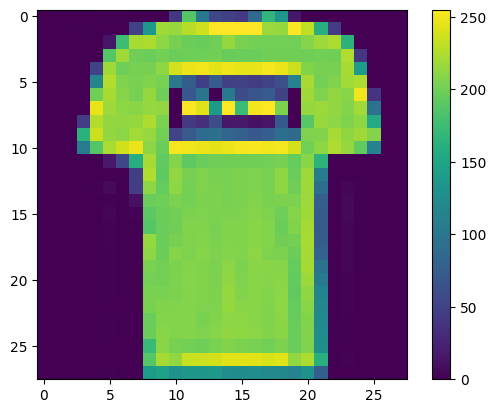

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

# **Data Processing and Creating a Model**

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2815 - accuracy: 0.8963
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.9009
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2566 - accuracy: 0.9050
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2493 - accuracy: 0.9070
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2369 - accuracy: 0.9109
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2305 - accuracy: 0.9149
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2245 - accuracy: 0.9158
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9189
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2100 - accuracy: 0.9214
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.203

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print(f'Test accuracy: {test_acc * 100} %')

313/313 [==============================] - 1s 2ms/step - loss: 0.3539 - accuracy: 0.8788
Test accuracy: 87.87999749183655 %


# Predictions

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(predictions[0])
np.argmax(predictions[0])

[6.2958856e-07 2.1102179e-14 2.4144597e-09 2.6100483e-11 2.3269077e-08
 4.0972685e-05 4.5656310e-09 9.7434046e-03 6.0336291e-08 9.9021477e-01]


9

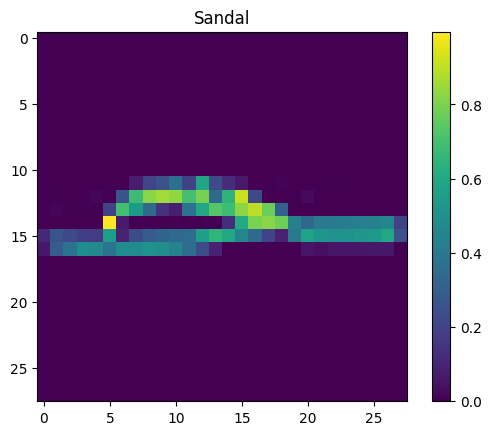

In [ ]:
n = 8 # Item to predict as per argmax

plt.figure()
plt.imshow(test_images[n])
plt.colorbar()
plt.title(class_names[np.argmax(predictions[n])])
plt.grid(False)
plt.show()

# Verifying predictions

Pick a number: 893123
Pick a number: 83749
Pick a number: 6
1/1 [==============================] - 0s 19ms/step


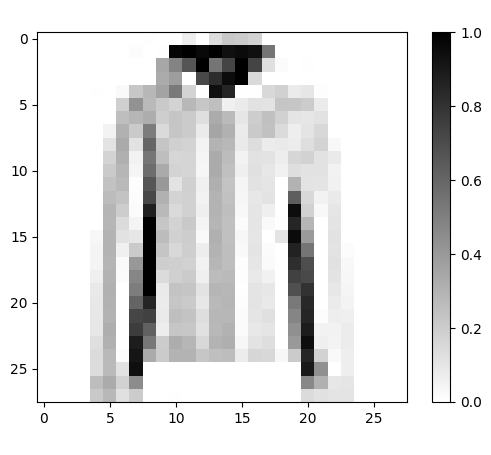

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
